# Example: Graph generation from a gene

This notebook will show you how to use the tool to generate a KG on the underlying data.

In [1]:
# Import modules
import pickle

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from pyBiodatafuse import id_mapper
from pyBiodatafuse.annotators import disgenet, opentargets, stringdb, wikipathways
from pyBiodatafuse.graph import generator
from pyBiodatafuse.utils import combine_sources

### Load the input list and convert it to a dataframe

In [2]:
genes_of_interest = """AAGRN
ALG14
ALG2
CHAT
CHD8
CHRNA1
CHRNB1
CHRND
CHRNE
CHRNG
COL13A1
COLQ
DOK7
DPAGT1
GFPT1
GMPPB
LAMA5
LAMB2
LRP4
MUSK
MYO9A
PLEC
PREPL
PURA
RAPSN
RPH3A
SCN4A
SLC18A3
SLC25A1
SLC5A7
SNAP25
SYT2
TOR1AIP1
UNC13A
VAMP1"""
gene_list = genes_of_interest.split("\n")
len(gene_list)

35

In [3]:
data_input = pd.DataFrame(gene_list, columns=["identifier"])
data_input.head()

identifier
0      AAGRN
1      ALG14
2       ALG2
3       CHAT
4       CHD8

### Entity resolution using BridgeDB

In [4]:
bridgdb_df, bridgdb_metadata = id_mapper.bridgedb_xref(
    identifiers=data_input["identifier"],
    input_species="Human",
    input_datasource="HGNC",
    output_datasource="All",
)
bridgdb_df.head()

identifier identifier.source      target   target.source
0      AAGRN              HGNC                         NaN
1      ALG14              HGNC  1553954_at            Affy
2      ALG14              HGNC      Q96F25  Uniprot-TrEMBL
3      ALG14              HGNC  GO:0016021   Gene Ontology
4      ALG14              HGNC  GO:0016020   Gene Ontology

# Disease annotating using DisGeNet

In [5]:
api_key = "0209751bfa7b6a981a8f5fb5f062313067ecd36c"  # TODO: add your key
params = {"source": "CURATED", "format": "json"}  # only curated data
disgenet_result, disgenet_metadata = disgenet.get_gene_disease(
    bridgedb_df=bridgdb_df, api_key=api_key, params=params
)
disgenet_result.head()

identifier identifier.source  target target.source  \
0      ALG14              HGNC  199857     NCBI Gene   
1       ALG2              HGNC   85365     NCBI Gene   
2       CHAT              HGNC    1103     NCBI Gene   
3       CHD8              HGNC   57680     NCBI Gene   
4     CHRNA1              HGNC    1134     NCBI Gene   

                                            DisGeNET  
0  [{'gene_dsi': 0.722, 'gene_dpi': 0.308, 'gene_...  
1  [{'gene_dsi': 0.67, 'gene_dpi': 0.423, 'gene_p...  
2  [{'gene_dsi': 0.52, 'gene_dpi': 0.808, 'gene_p...  
3  [{'gene_dsi': 0.656, 'gene_dpi': 0.577, 'gene_...  
4  [{'gene_dsi': 0.615, 'gene_dpi': 0.577, 'gene_...

In [6]:
disgenet_result["DisGeNET"][0]

[{'gene_dsi': 0.722,
  'gene_dpi': 0.308,
  'gene_pli': 0.00093727,
  'protein_class': None,
  'protein_class_name': None,
  'diseaseid': 'C4015596',
  'disease_name': 'MYASTHENIC SYNDROME, CONGENITAL, 15',
  'disease_class': None,
  'disease_class_name': None,
  'disease_type': 'disease',
  'disease_semantic_type': 'Disease or Syndrome',
  'score': 0.6,
  'ei': 1.0,
  'el': None,
  'year_initial': 2013.0,
  'year_final': 2017.0,
  'source': 'CURATED'},
 {'gene_dsi': 0.722,
  'gene_dpi': 0.308,
  'gene_pli': 0.00093727,
  'protein_class': None,
  'protein_class_name': None,
  'diseaseid': 'C0751882',
  'disease_name': 'Myasthenic Syndromes, Congenital',
  'disease_class': 'C16;C10',
  'disease_class_name': '   Congenital, Hereditary, and Neonatal Diseases and Abnormalities;    Nervous System Diseases',
  'disease_type': 'disease',
  'disease_semantic_type': 'Disease or Syndrome',
  'score': 0.51,
  'ei': 1.0,
  'el': 'strong',
  'year_initial': 2013.0,
  'year_final': 2013.0,
  'source

# Gene location annotation from OpenTargets

In [7]:
loc_df, opentargets_loc_metadata = opentargets.get_gene_location(bridgedb_df=bridgdb_df)
loc_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                OpenTargets_Location  
0  [{'loc_identifier': 'SL-0097', 'subcellular_lo...  
1  [{'loc_identifier': 'SL-0162', 'subcellular_lo...  
2  [{'loc_identifier': nan, 'subcellular_loc': na...  
3  [{'loc_identifier': 'SL-0191', 'subcellular_lo...  
4  [{'loc_identifier': 'SL-0219', 'subcellular_lo...

In [8]:
go_process_df, opentargets_go_metadata = opentargets.get_gene_go_process(bridgedb_df=bridgdb_df)
go_process_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                          GO_Process  
0  [{'go_id': 'GO:0006488', 'go_name': 'dolichol-...  
1  [{'go_id': 'GO:0046982', 'go_name': 'protein h...  
2  [{'go_id': 'GO:0004102', 'go_name': 'choline O...  
3  [{'go_id': 'GO:0005654', 'go_name': 'nucleopla...  
4  [{'go_id': 'GO:0050905', 'go_name': 'neuromusc...

In [9]:
reactome_process_df, opentargets_process_metadata = opentargets.get_gene_reactome_pathways(
    bridgedb_df=bridgdb_df
)
reactome_process_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                   Reactome_Pathways  
0  [{'pathway_name': 'Biosynthesis of the N-glyca...  
1  [{'pathway_name': 'Biosynthesis of the N-glyca...  
2  [{'pathway_name': 'Synthesis of PC', 'pathway_...  
3  [{'pathway_name': 'Deactivation of the beta-ca...  
4  [{'pathway_name': 'Highly calcium permeable ni...

In [10]:
drug_df, opentargets_drug_metadata = opentargets.get_gene_drug_interactions(bridgedb_df=bridgdb_df)
drug_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                        ChEMBL_Drugs  
0  [{'chembl_id': nan, 'drug_name': nan, 'relatio...  
1  [{'chembl_id': nan, 'drug_name': nan, 'relatio...  
2  [{'chembl_id': nan, 'drug_name': nan, 'relatio...  
3  [{'chembl_id': nan, 'drug_name': nan, 'relatio...  
4  [{'chembl_id': 'CHEMBL1201248', 'drug_name': '...

In [11]:
disease_df, opentargets_disease_metadata = opentargets.get_gene_disease_associations(
    bridgedb_df=bridgdb_df
)
disease_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                OpenTargets_Diseases  
0  [{'disease_id': nan, 'disease_name': nan, 'the...  
1  [{'disease_id': nan, 'disease_name': nan, 'the...  
2  [{'disease_id': nan, 'disease_name': nan, 'the...  
3  [{'disease_id': nan, 'disease_name': nan, 'the...  
4  [{'disease_id': 'EFO_1000637', 'disease_name':...

# WikiPathways pathways

In [12]:
wp_df, wp_metadata = wikipathways.get_gene_wikipathway(bridgedb_df=bridgdb_df)
wp_df.head()

identifier identifier.source  target target.source  \
0      ALG14              HGNC  199857     NCBI Gene   
1       ALG2              HGNC   85365     NCBI Gene   
2       CHAT              HGNC    1103     NCBI Gene   
3       CHD8              HGNC   57680     NCBI Gene   
4     CHRNA1              HGNC    1134     NCBI Gene   

                                        WikiPathways  
0  [{'pathwayId': 'WP5153', 'pathwayLabel': 'N-gl...  
1  [{'pathwayId': 'WP5153', 'pathwayLabel': 'N-gl...  
2  [{'pathwayId': 'WP5352', 'pathwayLabel': '10q1...  
3  [{'pathwayId': 'WP428', 'pathwayLabel': 'Wnt s...  
4  [{'pathwayId': nan, 'pathwayLabel': nan, 'path...

# Protein-Protein interactions from STRING

In [13]:
ppi_df, ppi_metadata = stringdb.get_ppi(bridgedb_df=bridgdb_df)
ppi_df.head()

identifier identifier.source           target target.source  \
0      ALG14              HGNC  ENSG00000172339       Ensembl   
1       ALG2              HGNC  ENSG00000119523       Ensembl   
2       CHAT              HGNC  ENSG00000070748       Ensembl   
3       CHD8              HGNC  ENSG00000100888       Ensembl   
4     CHRNA1              HGNC  ENSG00000138435       Ensembl   

                                            stringdb  
0  [{'stringdb_link_to': 'CHRND', 'score': 0.586}...  
1  [{'stringdb_link_to': 'GMPPB', 'score': 0.652}...  
2  [{'stringdb_link_to': 'SLC5A7', 'score': 0.774...  
3                                                 []  
4  [{'stringdb_link_to': 'CHRND', 'score': 0.959}...

# Combing all the results into single dataframe

In [14]:
combined_df = combine_sources(
    [
        disgenet_result,
        loc_df,
        go_process_df,
        reactome_process_df,
        drug_df,
        disease_df,
        wp_df,
        ppi_df,
    ]
)

In [15]:
combined_df.head(4)

identifier identifier.source  target target.source  \
0      ALG14              HGNC  199857     NCBI Gene   
1       ALG2              HGNC   85365     NCBI Gene   
2       CHAT              HGNC    1103     NCBI Gene   
3       CHD8              HGNC   57680     NCBI Gene   

                                            DisGeNET  \
0  [{'gene_dsi': 0.722, 'gene_dpi': 0.308, 'gene_...   
1  [{'gene_dsi': 0.67, 'gene_dpi': 0.423, 'gene_p...   
2  [{'gene_dsi': 0.52, 'gene_dpi': 0.808, 'gene_p...   
3  [{'gene_dsi': 0.656, 'gene_dpi': 0.577, 'gene_...   

                                OpenTargets_Location  \
0  [{'loc_identifier': 'SL-0097', 'subcellular_lo...   
1  [{'loc_identifier': 'SL-0162', 'subcellular_lo...   
2  [{'loc_identifier': nan, 'subcellular_loc': na...   
3  [{'loc_identifier': 'SL-0191', 'subcellular_lo...   

                                          GO_Process  \
0  [{'go_id': 'GO:0006488', 'go_name': 'dolichol-...   
1  [{'go_id': 'GO:0046982', 'go_name': 'protein h...   
2  [{'go_id': 'GO:0004102', 'go_name': 'choline O...   
3  [{'go_id': 'GO:0005654', 'go_name': 'nucleopla...   

                                   Reactome_Pathways  \
0  [{'pathway_name': 'Biosynthesis of the N-glyca...   
1  [{'pathway_name': 'Biosynthesis of the N-glyca...   
2  [{'pathway_name': 'Synthesis of PC', 'pathway_...   
3  [{'pathway_name': 'Deactivation of the beta-ca...   

                                        ChEMBL_Drugs  \
0  [{'chembl_id': nan, 'drug_name': nan, 'relatio...   
1  [{'chembl_id': nan, 'drug_name': nan, 'relatio...   
2  [{'chembl_id': nan, 'drug_name': nan, 'relatio...   
3  [{'chembl_id': nan, 'drug_name': nan, 'relatio...   

                                OpenTargets_Diseases  \
0  [{'disease_id': nan, 'disease_name': nan, 'the...   
1  [{'disease_id': nan, 'disease_name': nan, 'the...   
2  [{'disease_id': nan, 'disease_name': nan, 'the...   
3  [{'disease_id': nan, 'disease_name': nan, 'the...   

                                        WikiPathways  \
0  [{'pathwayId': 'WP5153', 'pathwayLabel': 'N-gl...   
1  [{'pathwayId': 'WP5153', 'pathwayLabel': 'N-gl...   
2  [{'pathwayId': 'WP5352', 'pathwayLabel': '10q1...   
3  [{'pathwayId': 'WP428', 'pathwayLabel': 'Wnt s...   

                                            stringdb  
0  [{'stringdb_link_to': 'CHRND', 'score': 0.586}...  
1  [{'stringdb_link_to': 'GMPPB', 'score': 0.652}...  
2  [{'stringdb_link_to': 'SLC5A7', 'score': 0.774...  
3                                                 []

In [16]:
combined_df.shape

(34, 12)

# Exporting the database in pickle format

In [17]:
with open("combined_df.pkl", "wb") as out:
    pickle.dump(combined_df, out)

# Creating a graph from the annotated dataframe

In [18]:
combined_df = generator.load_dataframe_from_pickle("combined_df.pkl")

In [19]:
pygraph = generator.generate_networkx_graph(combined_df)

# Store the graph

In [ ]:
with open("networkx_graph.pkl", "wb") as out:
    pickle.dump(pygraph, out)

# Visualize the graph

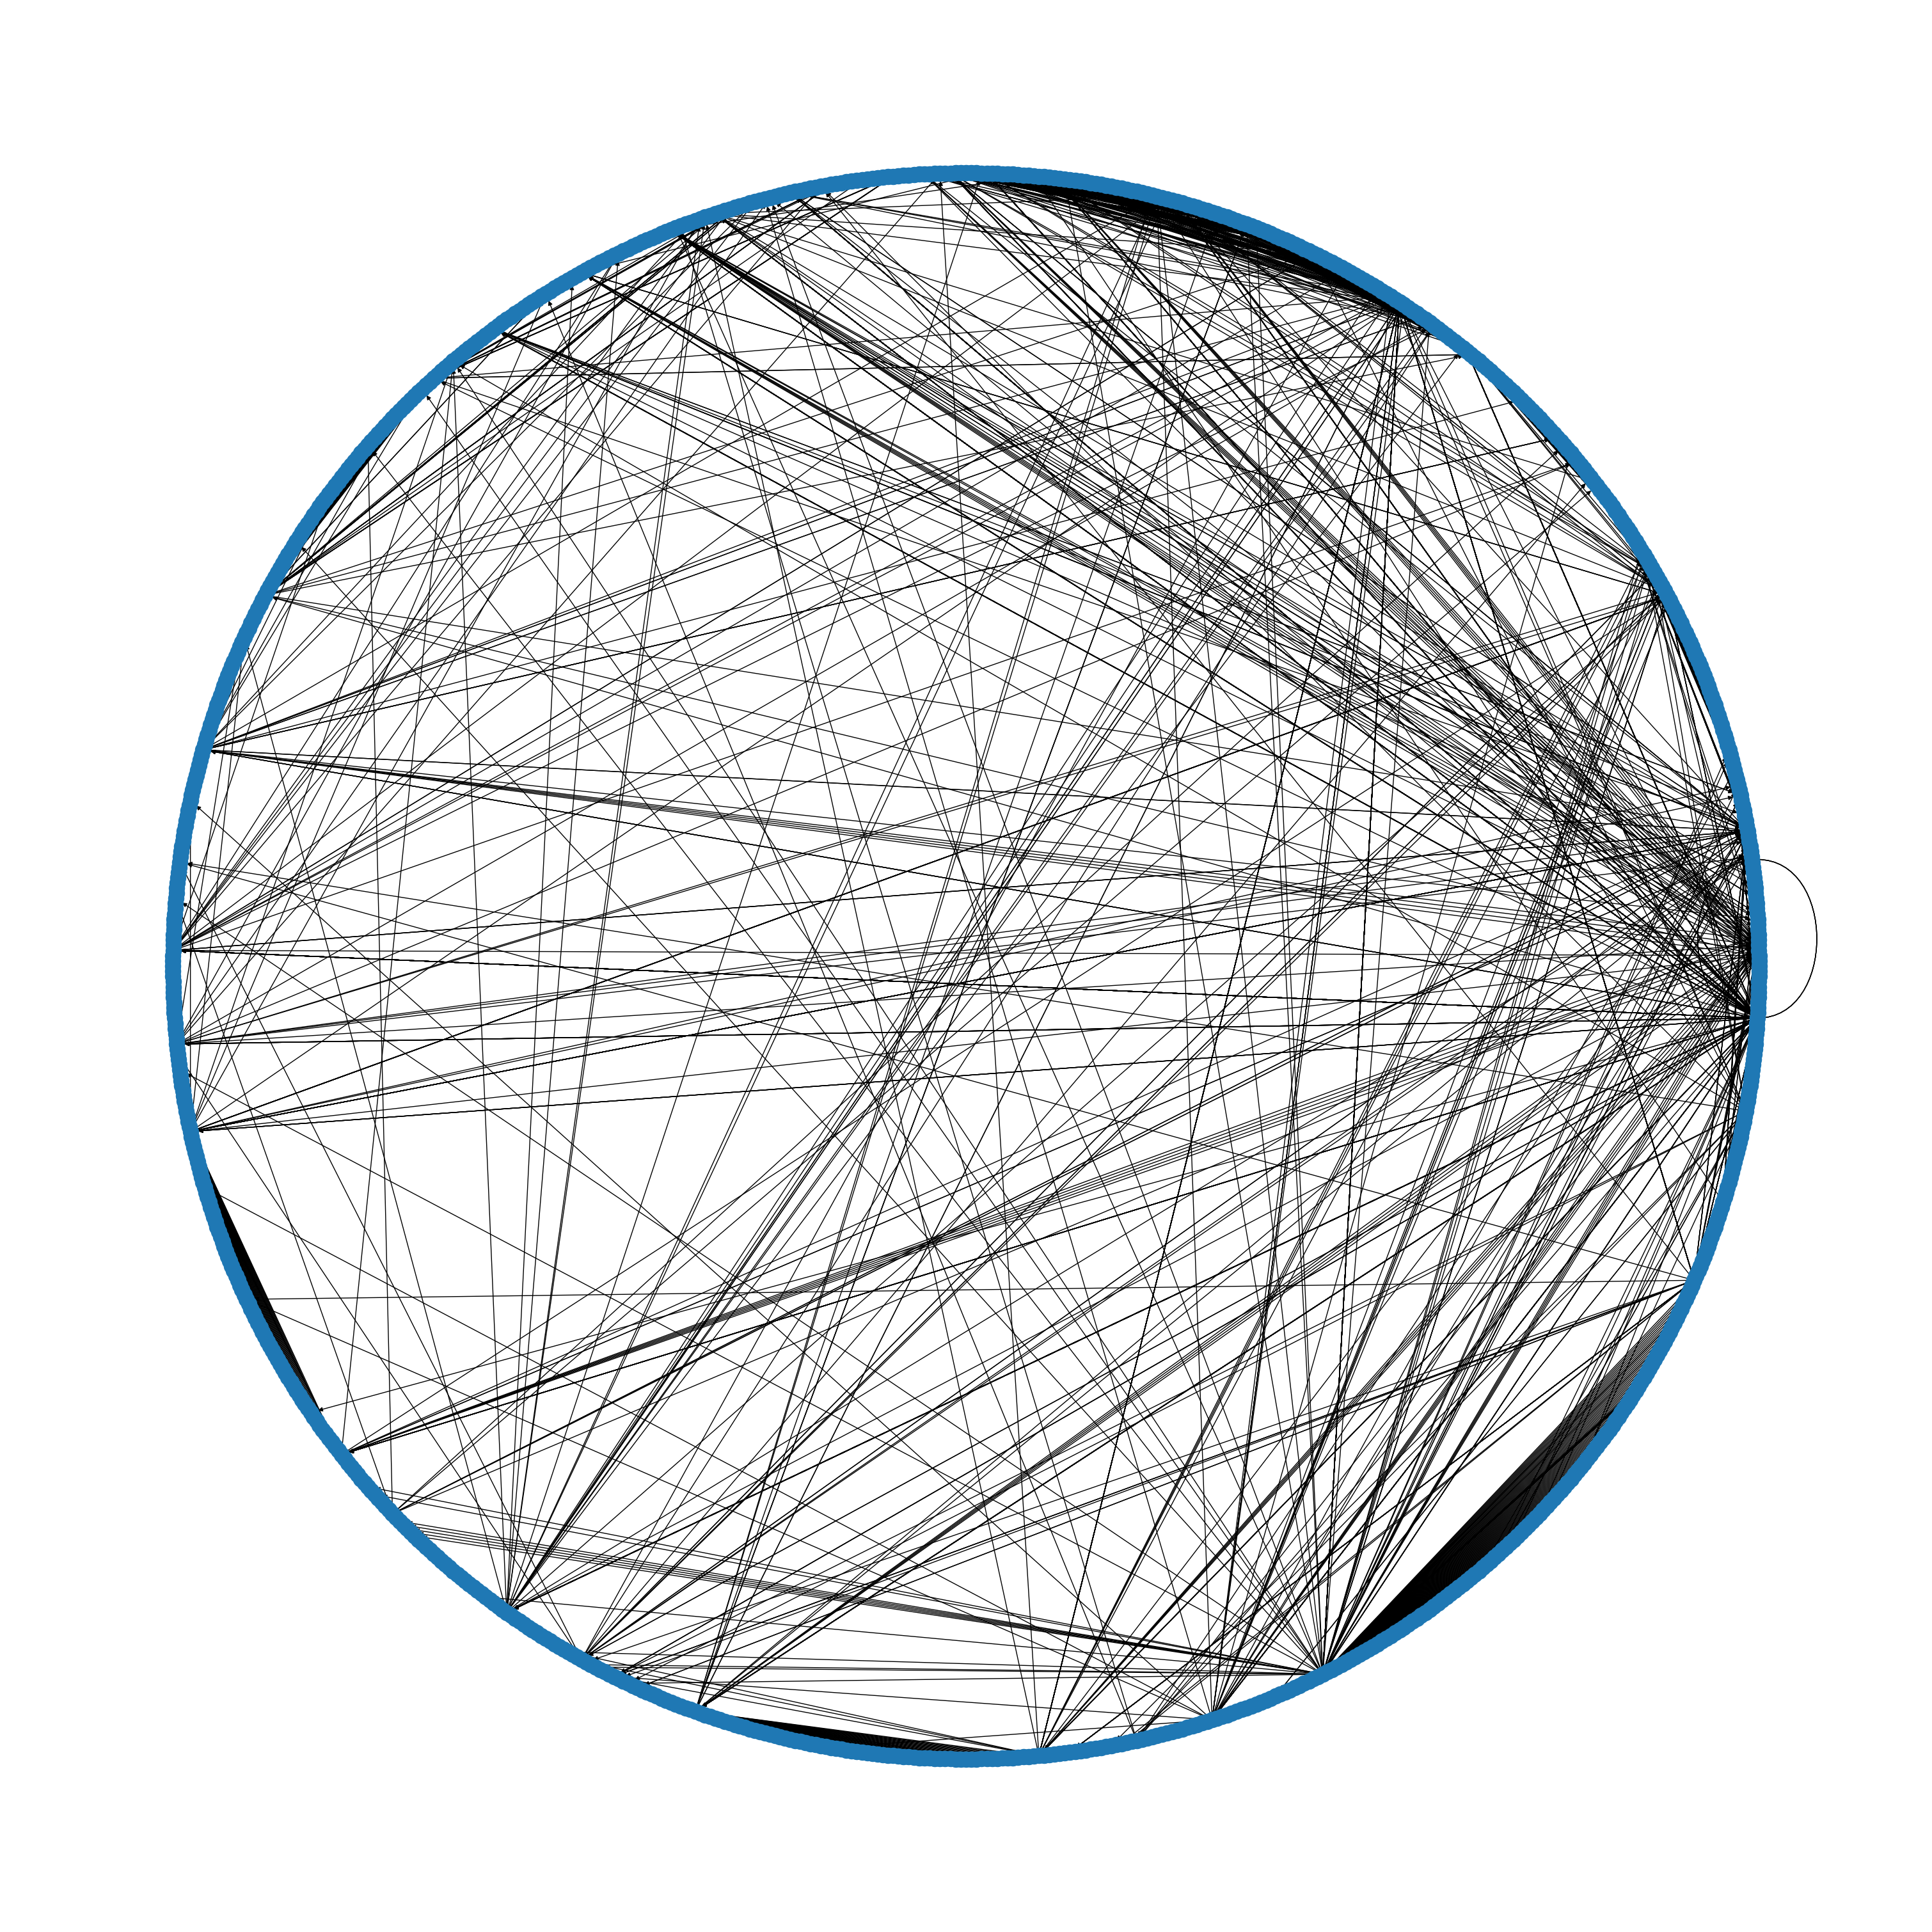

In [20]:
pos = nx.circular_layout(pygraph)

plt.figure(3, figsize=(30, 30))
nx.draw(pygraph, pos)
plt.show()